In [1]:
import pandas as pd 
import numpy as np 
from mlxtend.plotting import plot_decision_regions


In [3]:
#creating a dataset
df=pd.DataFrame()
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['X3']=[1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,X3
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

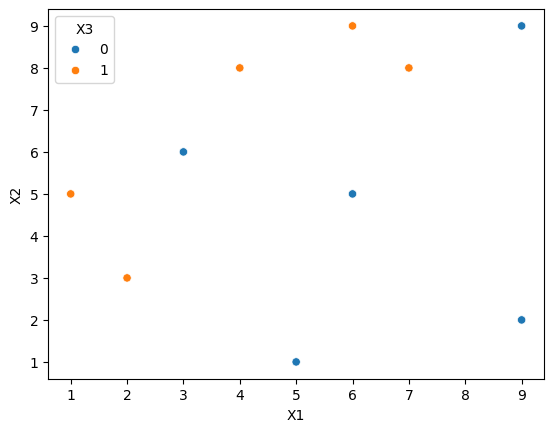

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['X3'])

In [6]:
df['weights']=1/df.shape[0]
'''
weight=1/row_numbres
'''


'\nweight=1/row_numbres\n'

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)#decision stumps
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [8]:
#step2- Train first model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

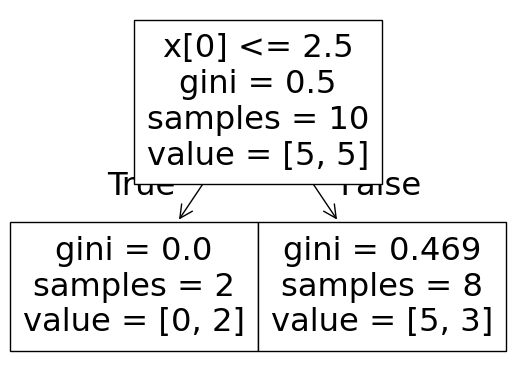

In [9]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

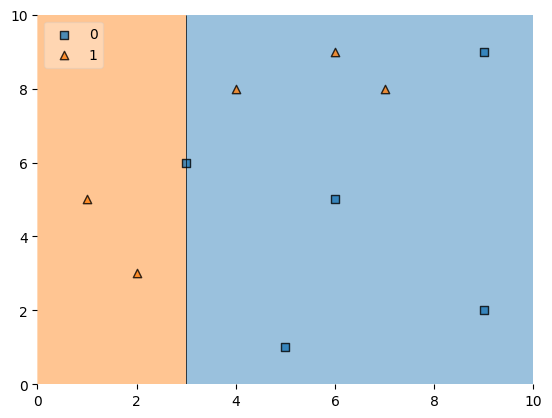

In [10]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [12]:
df['y_pred']=dt1.predict(X)#finding the predection of the values using the first decision stumps

In [13]:
df

,X1,X2,X3,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [14]:
def calculate_model_weight(error):#calculating the weight
    ''' 
    formula is 
    error=0.5*ln(1-error/error)
    '''
    return 0.5*np.log((1-error)/error)


In [15]:
#step3-calculating model weight
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [16]:
#step4-update weights
def update_row_weights(row,alpha=0.423):
    if row['X3']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [17]:
df['updated_weight']=df.apply(update_row_weights,axis=1)

In [18]:
df

,X1,X2,X3,weights,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508
